**Run the following two cells before you begin.**

In [ ]:
%autosave 10

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [4]:
# Import the data set
df = pd.read_csv("E:\Desktop\TECHNOCOLAB miniproject\Project-Data-Set-Repository-master\Data set\cleaned_data.csv")

In [7]:
# Define the sigmoid function
def sigmoid(X):
    Y=1/(1+np.exp(-X))
    return Y


Text(0.5, 1.0, 'The sigmoid function')

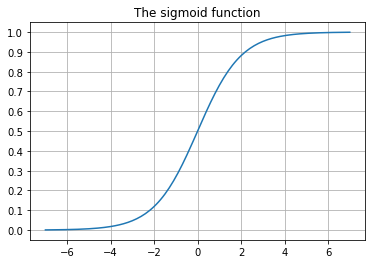

In [8]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [10]:
# Create a train/test split
X = df[['PAY_1','LIMIT_BAL']]
y= df['default payment next month']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.solver='liblinear'

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [13]:
# Fit the logistic regression model on training data
LR.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [14]:
# Make predictions using `.predict()`
y_pred = LR.predict(X_test)

In [16]:
# Find class probabilities using `.predict_proba()`
from sklearn import metrics
y_pred_proba =  LR.predict_proba(X_test)
y_pred_proba


array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [17]:
# Add column of 1s to features
LR.coef_

array([[ 8.27451187e-11, -6.80876727e-06]])

In [20]:
# Get coefficients and intercepts from trained model
theta0 = LR.intercept_
theta1 = LR.coef_[0][0]
theta2 = LR.coef_[0][1]

In [21]:
# Manually calculate predicted probabilities
temp = theta0 + theta1*X_test['PAY_1'] + theta2*X_test['LIMIT_BAL']
predicted_probabilities = sigmoid(temp)
predicted_probabilities

14306    0.251731
2978     0.415703
16641    0.203955
18580    0.203955
131      0.415703
           ...   
18160    0.278236
19779    0.415703
6666     0.415703
18990    0.172785
23253    0.336066
Length: 5333, dtype: float64

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [ ]:
# Manually calculate predicted classes


In [ ]:
# Compare to scikit-learn's predicted classes


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [ ]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC


In [22]:
# Use manually calculated predicted probabilities to calculate ROC AUC
ROC_AUC_SCORE = metrics.roc_auc_score(y_test,y_pred_proba[:,1])
ROC_AUC_SCORE

0.627207450280691